In [1]:
# Sumber dataset : https://www.kaggle.com/datasets/datascientistanna/customers-dataset

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
#Type your code here
df = pd.read_csv(r'Customers.csv')
df

CustomerID  Gender  Age  Annual_Income  Spending_Score     Profession  \
0              1    Male   19          15000              39     Healthcare   
1              2    Male   21          35000              81       Engineer   
2              3  Female   20          86000               6       Engineer   
3              4  Female   23          59000              77         Lawyer   
4              5  Female   31          38000              40  Entertainment   
...          ...     ...  ...            ...             ...            ...   
1995        1996  Female   71         184387              40         Artist   
1996        1997  Female   91          73158              32         Doctor   
1997        1998    Male   87          90961              14     Healthcare   
1998        1999    Male   77         182109               4      Executive   
1999        2000    Male   90         110610              52  Entertainment   

      Work_Experience  Family_Size  
0                   1            4  
1                   3            3  
2                   1            1  
3                   0            2  
4                   2            6  
...               ...          ...  
1995                8            7  
1996                7            7  
1997                9            2  
1998                7            2  
1999                5            2  

[2000 rows x 8 columns]

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here
# 1. Tinjau jumlah baris, kolom, dan jenis data

print(' \n--- Informasi Dataset ---\ ')
print("Jumlah Baris dan Kolom:", df.shape)
df.info()

 
--- Informasi Dataset ---\ 
Jumlah Baris dan Kolom: (2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       2000 non-null   int64 
 1   Gender           2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Annual_Income    2000 non-null   int64 
 4   Spending_Score   2000 non-null   int64 
 5   Profession       1965 non-null   object
 6   Work_Experience  2000 non-null   int64 
 7   Family_Size      2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Family_Size         0
dtype: int64

In [6]:
df_clustering= df.dropna()

In [7]:
df_clustering.isna().sum()

CustomerID         0
Gender             0
Age                0
Annual_Income      0
Spending_Score     0
Profession         0
Work_Experience    0
Family_Size        0
dtype: int64

In [8]:
df_clustering.nunique()

CustomerID         1965
Gender                2
Age                 100
Annual_Income      1755
Spending_Score      101
Profession            9
Work_Experience      18
Family_Size           9
dtype: int64

In [9]:
# Mengecek jumlah data yang hilang di setiap kolom
print("\nJumlah Data Hilang di Setiap Kolom:\n")
df_clustering.isnull().sum()


Jumlah Data Hilang di Setiap Kolom:



CustomerID         0
Gender             0
Age                0
Annual_Income      0
Spending_Score     0
Profession         0
Work_Experience    0
Family_Size        0
dtype: int64

In [10]:
# Menampilkan statistik deskriptif awal
print("\nStatistik Deskriptif:\n")
df_clustering.describe()


Statistik Deskriptif:



CustomerID          Age  Annual_Income  Spending_Score  \
count  1965.000000  1965.000000    1965.000000     1965.000000   
mean   1000.309924    48.894656  110616.009669       51.078880   
std     578.443714    28.414889   45833.860195       27.977176   
min       1.000000     0.000000       0.000000        0.000000   
25%     498.000000    25.000000   74350.000000       28.000000   
50%    1000.000000    48.000000  109759.000000       50.000000   
75%    1502.000000    73.000000  149095.000000       75.000000   
max    2000.000000    99.000000  189974.000000      100.000000   

       Work_Experience  Family_Size  
count      1965.000000  1965.000000  
mean          4.092621     3.757252  
std           3.926459     1.968335  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

In [11]:
#Mengubah Tipe Data Kolom
df_clustering['Age'] = df_clustering['Age'].astype(float)
df_clustering['Annual_Income'] = df_clustering['Annual_Income'].astype(float)
df_clustering['Spending_Score'] = df_clustering['Spending_Score'].astype(float)
df_clustering['Work_Experience'] = df_clustering['Work_Experience'].astype(float)
df_clustering['Family_Size'] = df_clustering['Family_Size'].astype(float)

C:\Users\OPTION\AppData\Local\Temp\ipykernel_4120\2542074297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Age'] = df_clustering['Age'].astype(float)
C:\Users\OPTION\AppData\Local\Temp\ipykernel_4120\2542074297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Annual_Income'] = df_clustering['Annual_Income'].astype(float)
C:\Users\OPTION\AppData\Local\Temp\ipykernel_4120\2542074297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [12]:
df_clustering

CustomerID  Gender   Age  Annual_Income  Spending_Score     Profession  \
0              1    Male  19.0        15000.0            39.0     Healthcare   
1              2    Male  21.0        35000.0            81.0       Engineer   
2              3  Female  20.0        86000.0             6.0       Engineer   
3              4  Female  23.0        59000.0            77.0         Lawyer   
4              5  Female  31.0        38000.0            40.0  Entertainment   
...          ...     ...   ...            ...             ...            ...   
1995        1996  Female  71.0       184387.0            40.0         Artist   
1996        1997  Female  91.0        73158.0            32.0         Doctor   
1997        1998    Male  87.0        90961.0            14.0     Healthcare   
1998        1999    Male  77.0       182109.0             4.0      Executive   
1999        2000    Male  90.0       110610.0            52.0  Entertainment   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]


--- Visualisasi Distribusi Variabel Numerik ---



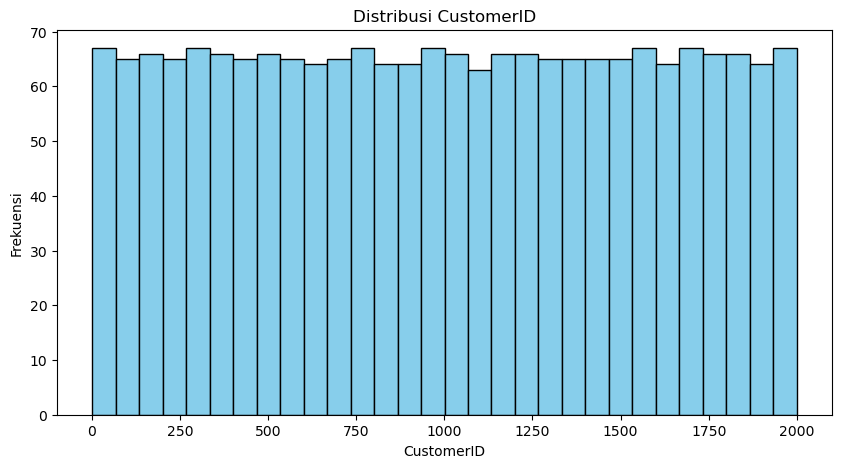

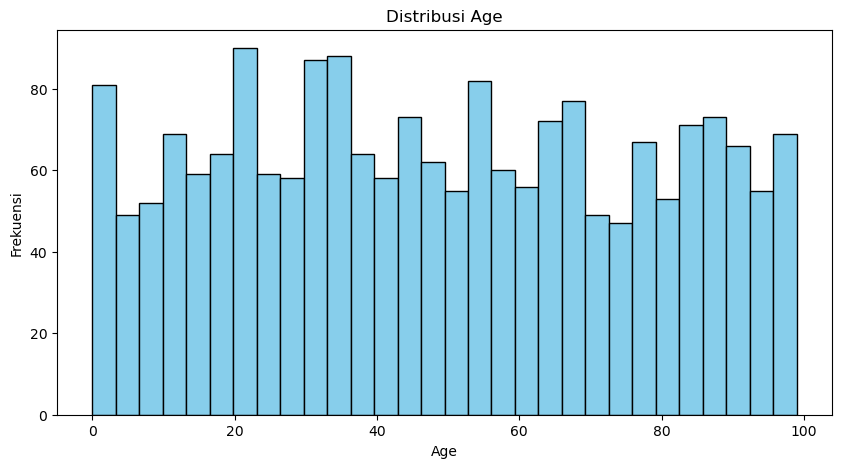

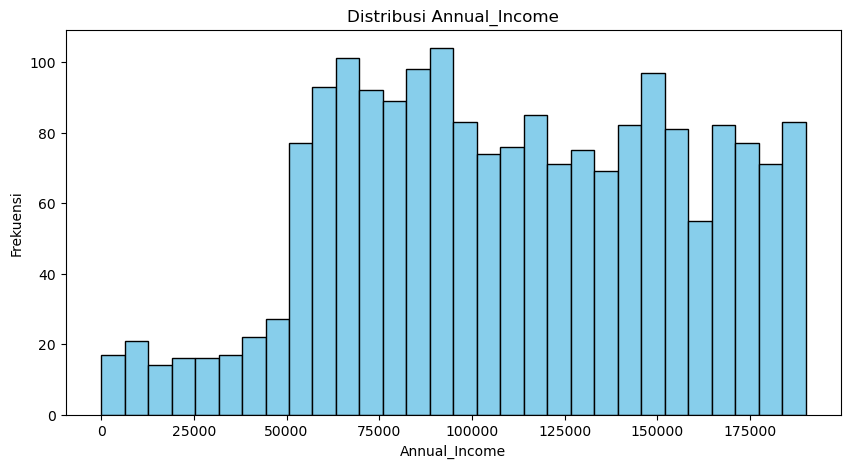

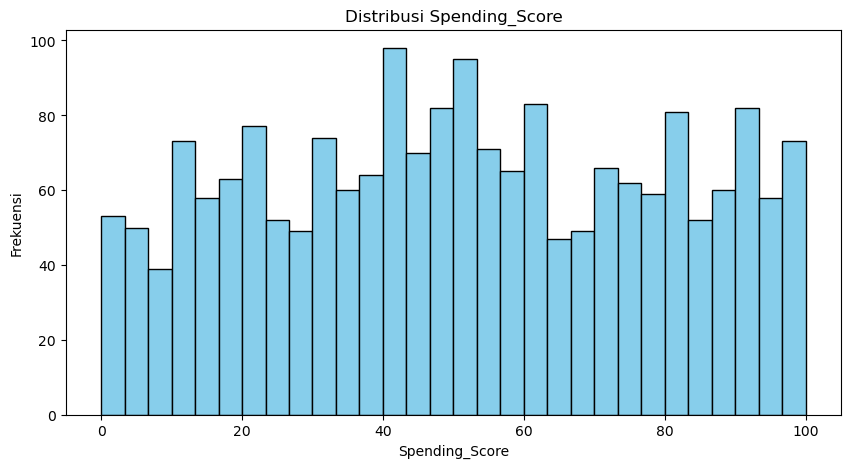

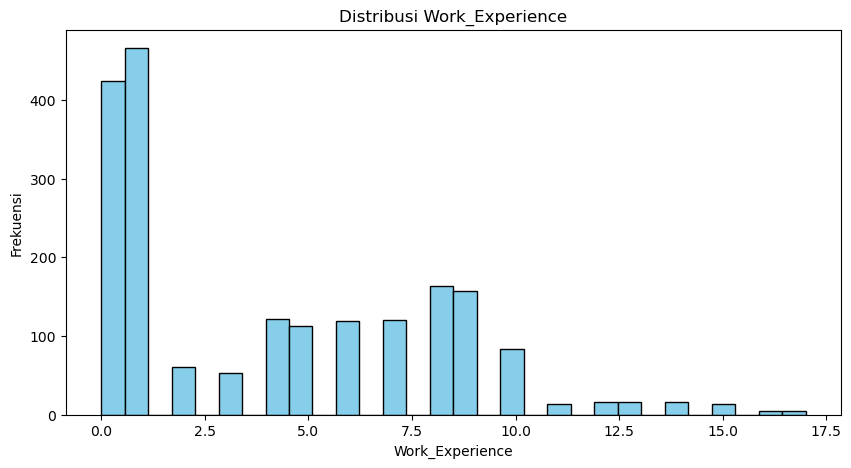

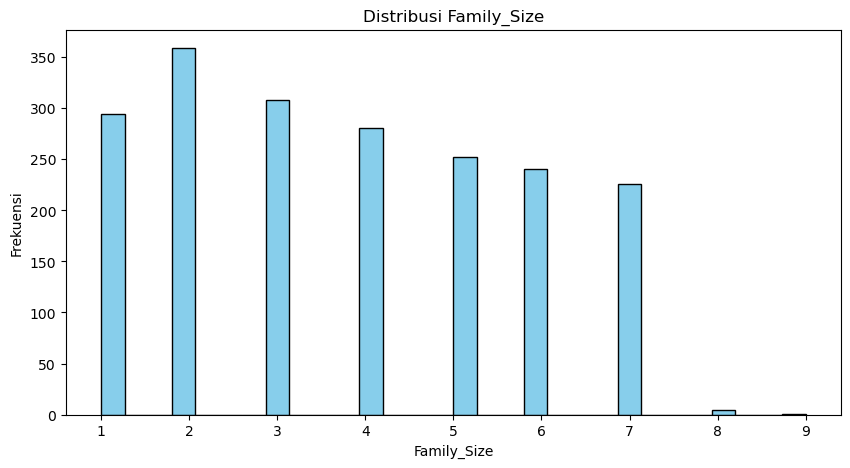

In [13]:
# Analisis Distribusi Variabel Numerik dan Korelasi
# Visualisasi Distribusi Variabel Numerik
numerical_cols = df_clustering.select_dtypes(include=[np.number]).columns

print("\n--- Visualisasi Distribusi Variabel Numerik ---\n")
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.hist(df_clustering[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

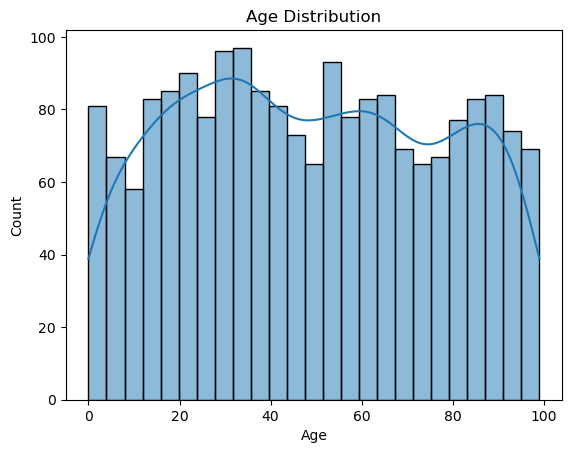

In [14]:
sns.histplot(df_clustering['Age'], kde=True, bins=25)
plt.title('Age Distribution')
plt.show()

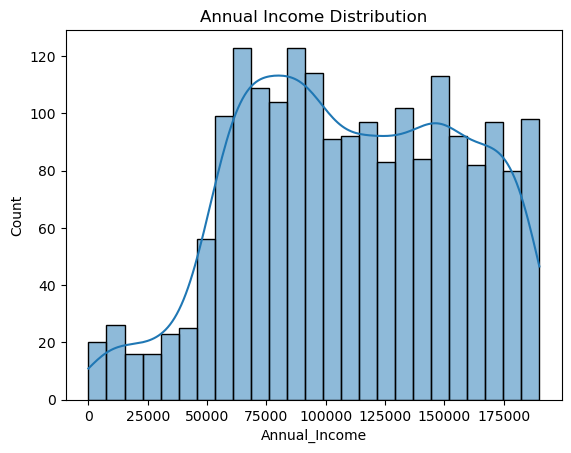

In [15]:
sns.histplot(df_clustering['Annual_Income'], kde=True, bins=25)
plt.title('Annual Income Distribution')
plt.show()

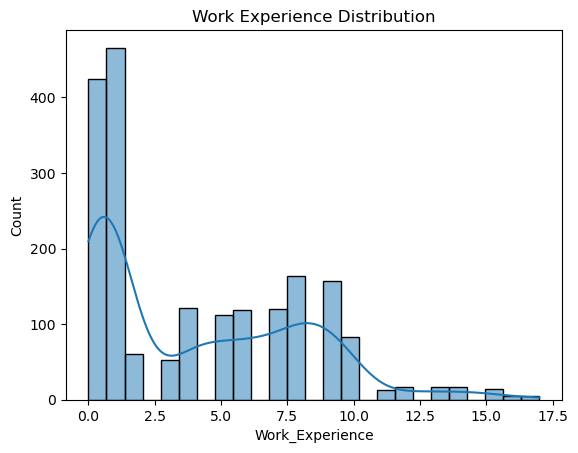

In [16]:
sns.histplot(df_clustering['Work_Experience'], kde=True, bins=25)
plt.title('Work Experience Distribution')
plt.show()

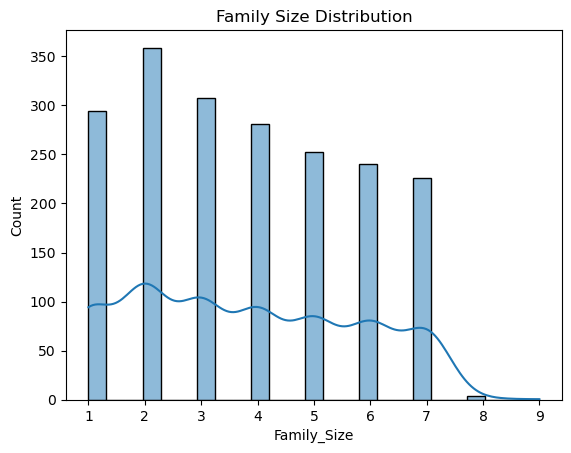

In [17]:
sns.histplot(df_clustering['Family_Size'], kde=True, bins=25)
plt.title('Family Size Distribution')
plt.show()

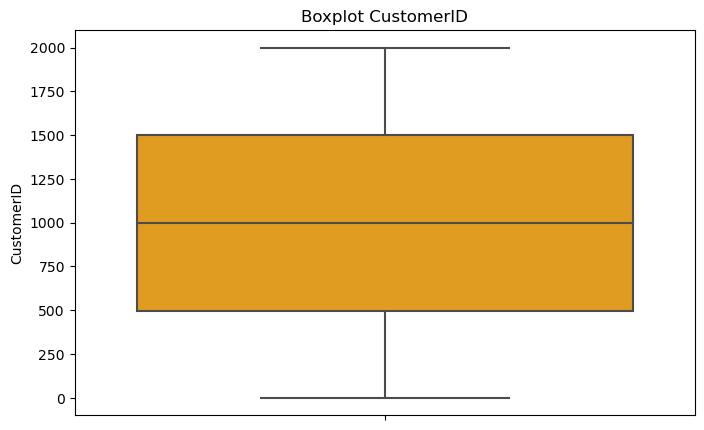

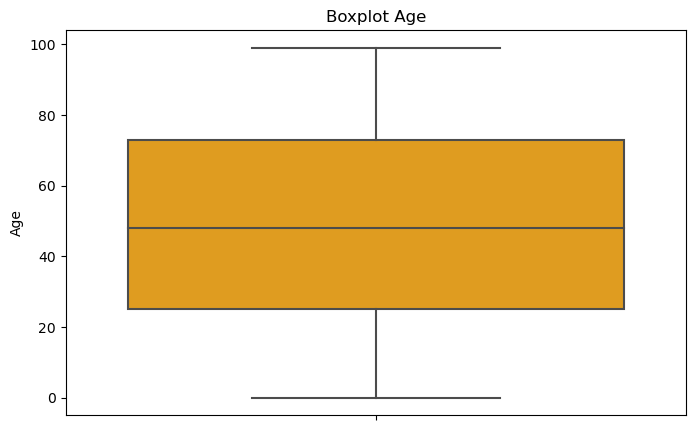

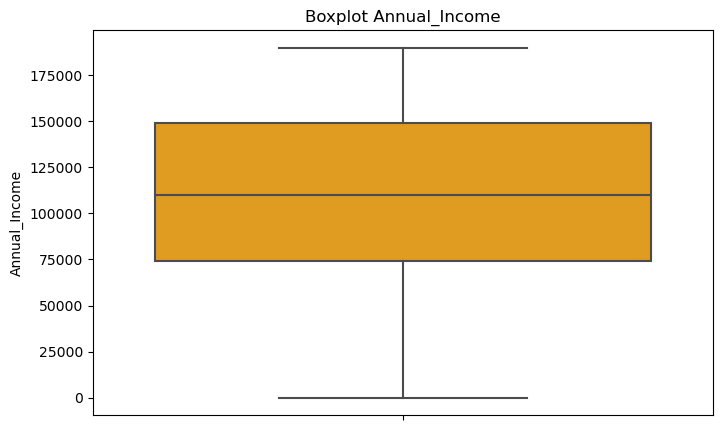

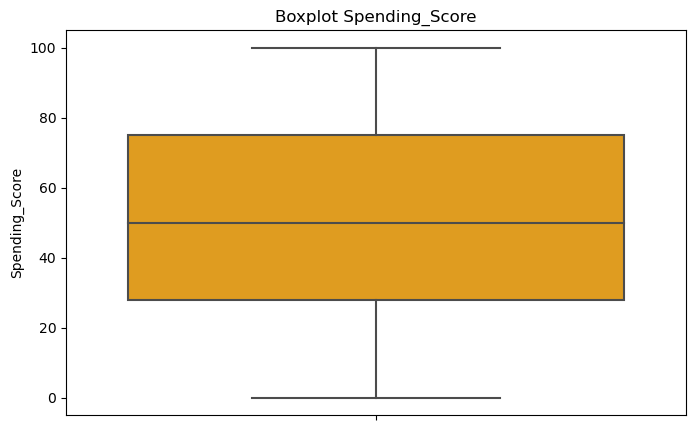

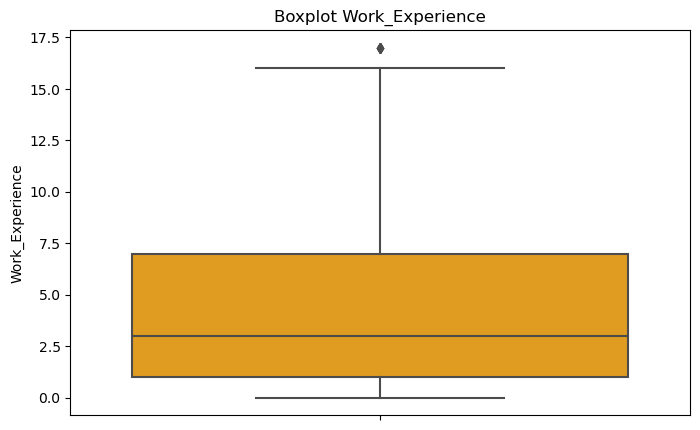

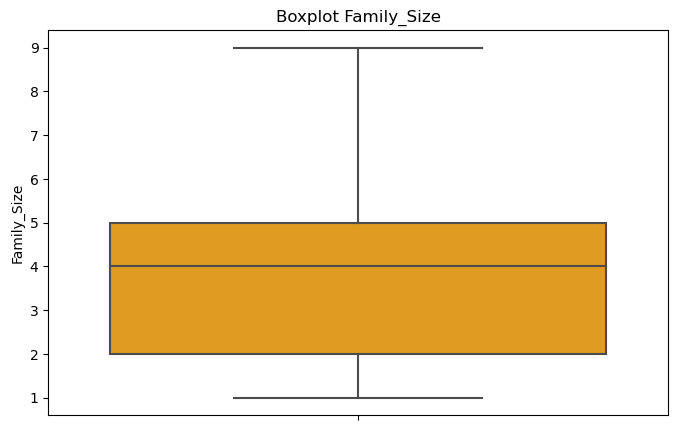

In [18]:
# Boxplot untuk distribusi numerik
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df_clustering[col], color='orange')
    plt.title(f'Boxplot {col}')
    plt.show()



In [19]:
# Korelasi antar variabel numerik
correlation_matrix = df_clustering[numerical_cols].corr()
print("\n--- Korelasi Antar Variabel Numerik ---\n")
print(correlation_matrix)




--- Korelasi Antar Variabel Numerik ---

                 CustomerID       Age  Annual_Income  Spending_Score  \
CustomerID         1.000000  0.074915       0.329822        0.014387   
Age                0.074915  1.000000       0.021064       -0.037387   
Annual_Income      0.329822  0.021064       1.000000        0.026716   
Spending_Score     0.014387 -0.037387       0.026716        1.000000   
Work_Experience    0.092284 -0.016771       0.087135       -0.025587   
Family_Size        0.163545  0.034810       0.093757        0.005859   

                 Work_Experience  Family_Size  
CustomerID              0.092284     0.163545  
Age                    -0.016771     0.034810  
Annual_Income           0.087135     0.093757  
Spending_Score         -0.025587     0.005859  
Work_Experience         1.000000     0.012727  
Family_Size             0.012727     1.000000  


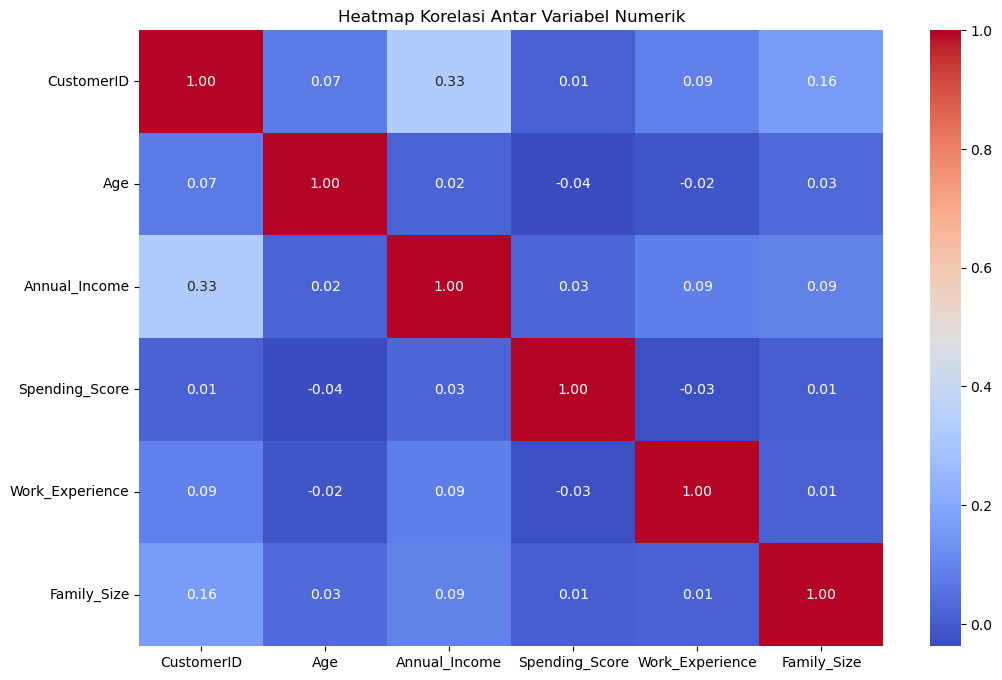

In [20]:
# Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()



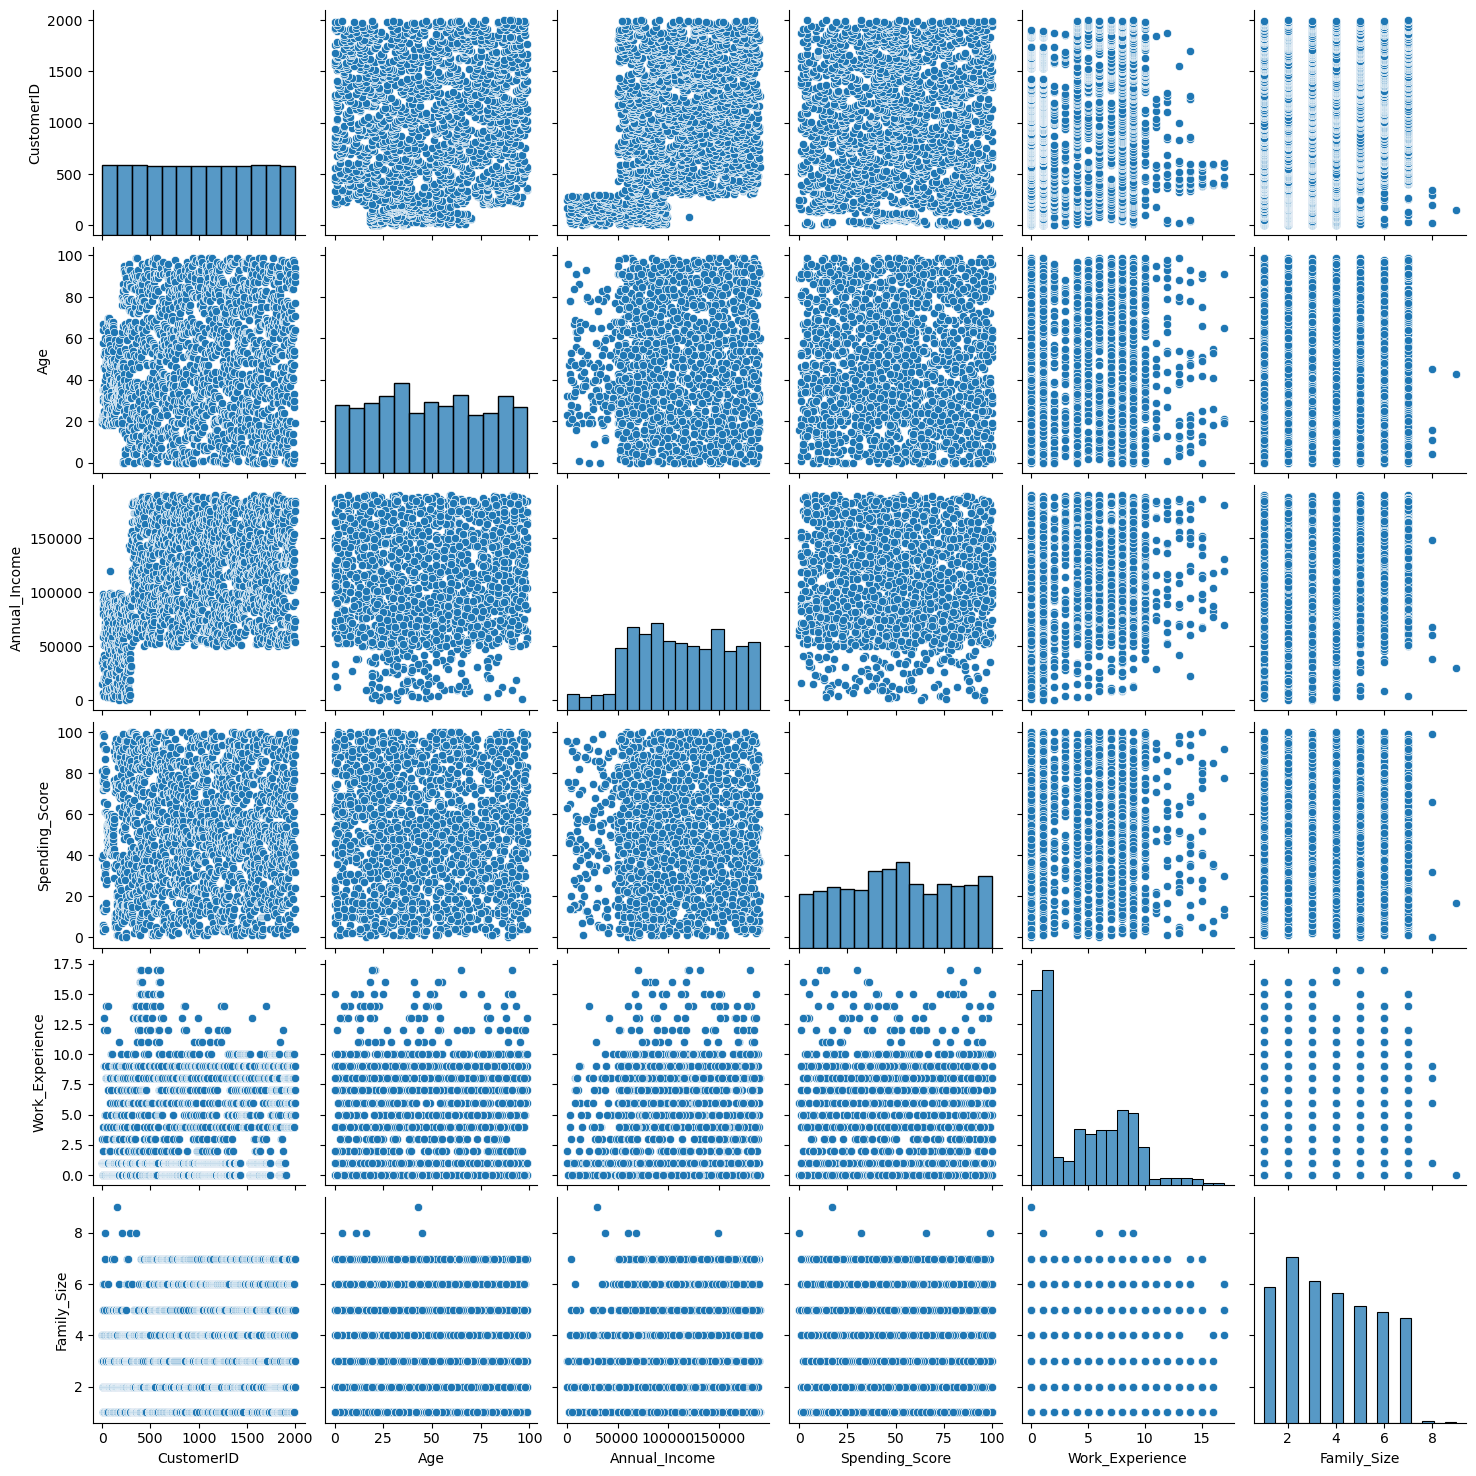

In [21]:
# Scatter Plot untuk variabel numerik (pairplot)
sns.pairplot(df_clustering[numerical_cols])
plt.show()


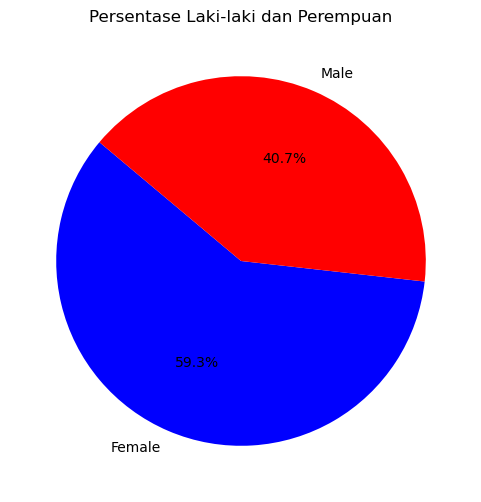

In [22]:
# 4. Visualisasi Data Kategorikal
gender_counts = df_clustering['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Persentase Laki-laki dan Perempuan')
plt.show()


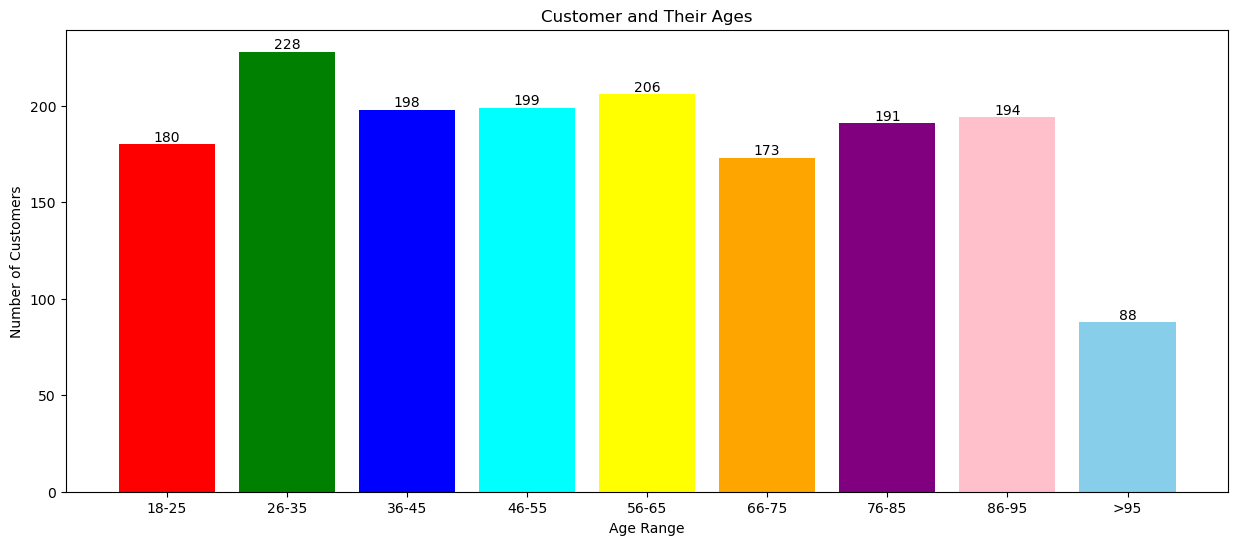

In [23]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
Age18_25 = df_clustering.Age[(df_clustering.Age >= 18) & (df_clustering.Age <= 25)]
Age26_35 = df_clustering.Age[(df_clustering.Age >= 26) & (df_clustering.Age <= 35)]
Age36_45 = df_clustering.Age[(df_clustering.Age >= 36) & (df_clustering.Age <= 45)]
Age46_55 = df_clustering.Age[(df_clustering.Age >= 46) & (df_clustering.Age <= 55)]
Age56_65 = df_clustering.Age[(df_clustering.Age >= 56) & (df_clustering.Age <= 65)]
Age66_75 = df_clustering.Age[(df_clustering.Age >= 66) & (df_clustering.Age <= 75)]
Age76_85 = df_clustering.Age[(df_clustering.Age >= 76) & (df_clustering.Age <= 85)]
Age86_95 = df_clustering.Age[(df_clustering.Age >= 86) & (df_clustering.Age <= 95)]
Age95above = df_clustering.Age[df_clustering.Age >= 95]
 
# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86-95", ">95"]
y = [len(Age18_25.values), len(Age26_35.values), len(Age36_45.values), len(Age46_55.values), len(Age56_65.values)
     ,len(Age66_75.values),len(Age76_85.values), len(Age86_95.values), len(Age95above.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple', 'pink', 'skyblue','black'])
plt.title("Customer and Their Ages")
plt.xlabel("Age Range")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

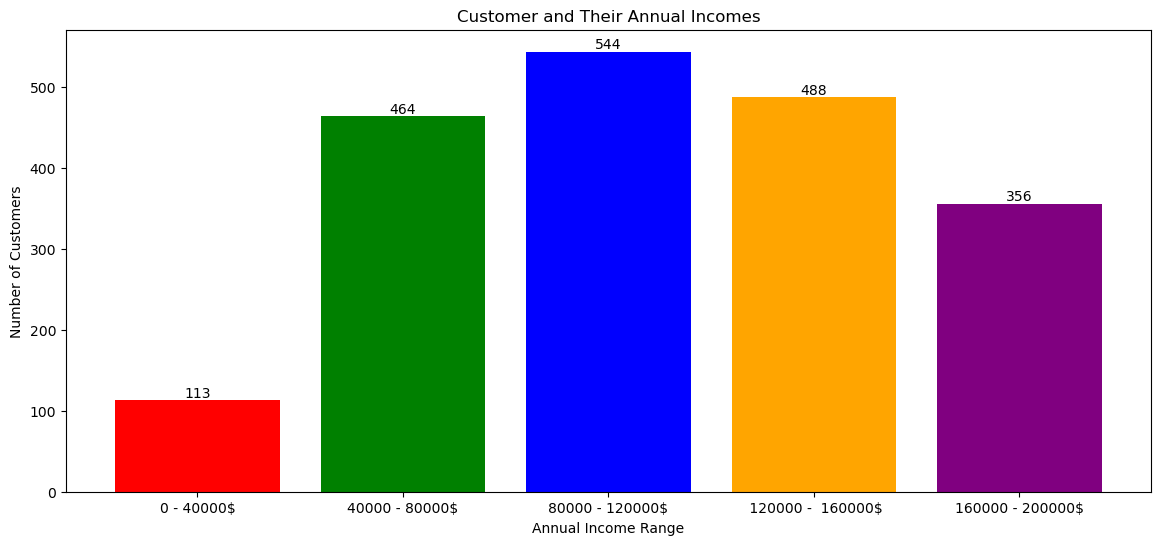

In [24]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori yang baru
Income_Range1 = df_clustering['Annual_Income'][(df_clustering['Annual_Income'] >= 0) & (df_clustering['Annual_Income'] <= 40000)]
Income_Range2 = df_clustering['Annual_Income'][(df_clustering['Annual_Income'] > 40000) & (df_clustering['Annual_Income'] <= 80000)]
Income_Range3 = df_clustering['Annual_Income'][(df_clustering['Annual_Income'] > 80000) & (df_clustering['Annual_Income'] <= 120000)]
Income_Range4 = df_clustering['Annual_Income'][(df_clustering['Annual_Income'] > 120000) & (df_clustering['Annual_Income'] <= 160000)]
Income_Range5 = df_clustering['Annual_Income'][(df_clustering['Annual_Income'] > 160000) & (df_clustering['Annual_Income'] <= 200000)]


# Menyusun data untuk plotting
x = ["0 - 40000$", "40000 - 80000$", "80000 - 120000$", " 120000 -  160000$", "160000 - 200000$"]
y = [
    len(Income_Range1.values), 
    len(Income_Range2.values), 
    len(Income_Range3.values), 
    len(Income_Range4.values), 
    len(Income_Range5.values) 
]

# Membuat bar chart untuk distribusi pendapatan pelanggan
plt.figure(figsize=(14, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'orange', 'purple', 'yellow'])
plt.title("Customer and Their Annual Incomes")
plt.xlabel("Annual Income Range")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=10)

plt.show()


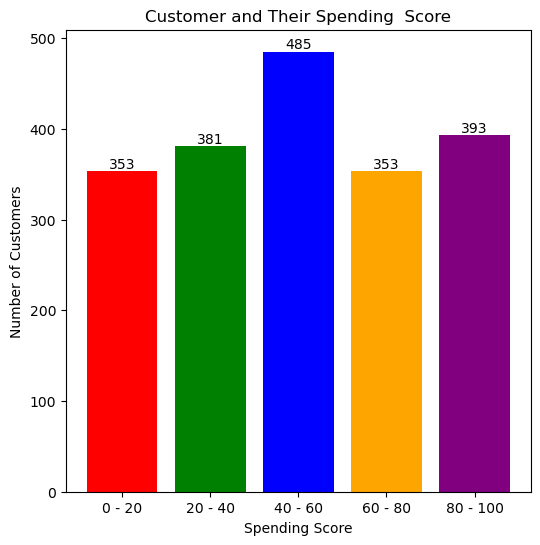

In [25]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori yang baru
Spending_Score1 = df_clustering['Spending_Score'][(df_clustering['Spending_Score'] >= 0) & (df_clustering['Spending_Score'] <= 20)]
Spending_Score2 = df_clustering['Spending_Score'][(df_clustering['Spending_Score'] > 20) & (df_clustering['Spending_Score'] <= 40)]
Spending_Score3 = df_clustering['Spending_Score'][(df_clustering['Spending_Score'] > 40) & (df_clustering['Spending_Score'] <= 60)]
Spending_Score4 = df_clustering['Spending_Score'][(df_clustering['Spending_Score'] > 60) & (df_clustering['Spending_Score'] <= 80)]
Spending_Score5 = df_clustering['Spending_Score'][(df_clustering['Spending_Score'] > 80) & (df_clustering['Spending_Score'] <= 100)]


# Menyusun data untuk plotting
x = ["0 - 20", "20 - 40", "40 - 60", "60 - 80", "80 - 100"]
y = [
    len(Spending_Score1.values), 
    len(Spending_Score2.values), 
    len(Spending_Score3.values), 
    len(Spending_Score4.values), 
    len(Spending_Score5.values) 
]

# Membuat bar chart untuk distribusi pendapatan pelanggan
plt.figure(figsize=(6, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'orange', 'purple', 'yellow'])
plt.title("Customer and Their Spending  Score")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=10)

plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [26]:
#Type your code here
# 1 Menghapus baris dengan data kosong
df_clustering = df_clustering.dropna()
df_clustering

CustomerID  Gender   Age  Annual_Income  Spending_Score     Profession  \
0              1    Male  19.0        15000.0            39.0     Healthcare   
1              2    Male  21.0        35000.0            81.0       Engineer   
2              3  Female  20.0        86000.0             6.0       Engineer   
3              4  Female  23.0        59000.0            77.0         Lawyer   
4              5  Female  31.0        38000.0            40.0  Entertainment   
...          ...     ...   ...            ...             ...            ...   
1995        1996  Female  71.0       184387.0            40.0         Artist   
1996        1997  Female  91.0        73158.0            32.0         Doctor   
1997        1998    Male  87.0        90961.0            14.0     Healthcare   
1998        1999    Male  77.0       182109.0             4.0      Executive   
1999        2000    Male  90.0       110610.0            52.0  Entertainment   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]

In [27]:
#2  Menghapus baris duplikat
df_clustering = df_clustering.drop_duplicates()
df_clustering 

CustomerID  Gender   Age  Annual_Income  Spending_Score     Profession  \
0              1    Male  19.0        15000.0            39.0     Healthcare   
1              2    Male  21.0        35000.0            81.0       Engineer   
2              3  Female  20.0        86000.0             6.0       Engineer   
3              4  Female  23.0        59000.0            77.0         Lawyer   
4              5  Female  31.0        38000.0            40.0  Entertainment   
...          ...     ...   ...            ...             ...            ...   
1995        1996  Female  71.0       184387.0            40.0         Artist   
1996        1997  Female  91.0        73158.0            32.0         Doctor   
1997        1998    Male  87.0        90961.0            14.0     Healthcare   
1998        1999    Male  77.0       182109.0             4.0      Executive   
1999        2000    Male  90.0       110610.0            52.0  Entertainment   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]

In [28]:
# 3 Penanganan Outliers
# Data numerik
numerical_features = ['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']

# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers(df_clustering, column):
    Q1 = df_clustering[column].quantile(0.25)  # Kuartil pertama (25%)
    Q3 = df_clustering[column].quantile(0.75)  # Kuartil ketiga (75%)
    IQR = Q3 - Q1                  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR   # Batas bawah
    upper_bound = Q3 + 1.5 * IQR   # Batas atas
    
    # Mask untuk mendeteksi outliers
    outliers = df_clustering[(df_clustering[column] < lower_bound) | (df_clustering[column] > upper_bound)]
    return outliers

# Mencari dan menampilkan jumlah outliers untuk setiap fitur numerik
outliers_info = {}
for column in numerical_features:
    outliers = detect_outliers(df_clustering, column)
    outliers_info[column] = {
        'total_outliers': len(outliers),
        'outliers_indices': outliers.index.tolist()
    }

# Menampilkan hasil deteksi outliers
for feature, info in outliers_info.items():
    print(f"Feature: {feature}")
    print(f"Total Outliers: {info['total_outliers']}")
    print(f"Outliers Indices: {info['outliers_indices']}")
    print('-' * 50)


Feature: Age
Total Outliers: 0
Outliers Indices: []
--------------------------------------------------
Feature: Annual_Income
Total Outliers: 0
Outliers Indices: []
--------------------------------------------------
Feature: Spending_Score
Total Outliers: 0
Outliers Indices: []
--------------------------------------------------
Feature: Work_Experience
Total Outliers: 5
Outliers Indices: [392, 405, 473, 566, 603]
--------------------------------------------------
Feature: Family_Size
Total Outliers: 0
Outliers Indices: []
--------------------------------------------------


In [29]:
# Menghapus Outlier
# Fungsi untuk menghapus outliers menggunakan IQR
def remove_outliers(df_clustering, column):
    Q1 = df_clustering[column].quantile(0.25)  # Kuartil pertama (25%)
    Q3 = df_clustering[column].quantile(0.75)  # Kuartil ketiga (75%)
    IQR = Q3 - Q1                   # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR    # Batas bawah
    upper_bound = Q3 + 1.5 * IQR    # Batas atas
    
    # Hanya menyimpan baris yang berada di dalam batas IQR
    return df_clustering[(df_clustering[column] >= lower_bound) & (df_clustering[column] <= upper_bound)]

# Menghapus outliers untuk Family_Size
df_cleaned = remove_outliers(df_clustering, 'Family_Size')

# Menghapus outliers untuk Work_Experience
df_cleaned = remove_outliers(df_cleaned, 'Work_Experience')

# Menampilkan DataFrame setelah outliers dihapus
print(f"Jumlah data sebelum penghapusan outliers: {len(df)}")
print(f"Jumlah data setelah penghapusan outliers: {len(df_cleaned)}")

df_cleaned = df_clustering
df_clustering

Jumlah data sebelum penghapusan outliers: 2000
Jumlah data setelah penghapusan outliers: 1960


CustomerID  Gender   Age  Annual_Income  Spending_Score     Profession  \
0              1    Male  19.0        15000.0            39.0     Healthcare   
1              2    Male  21.0        35000.0            81.0       Engineer   
2              3  Female  20.0        86000.0             6.0       Engineer   
3              4  Female  23.0        59000.0            77.0         Lawyer   
4              5  Female  31.0        38000.0            40.0  Entertainment   
...          ...     ...   ...            ...             ...            ...   
1995        1996  Female  71.0       184387.0            40.0         Artist   
1996        1997  Female  91.0        73158.0            32.0         Doctor   
1997        1998    Male  87.0        90961.0            14.0     Healthcare   
1998        1999    Male  77.0       182109.0             4.0      Executive   
1999        2000    Male  90.0       110610.0            52.0  Entertainment   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]

In [30]:
# 4 Normalisasi/Standardisasi
def normalize_data(df_clustering, numerical_columns):
    scaler = StandardScaler()
    df_scaled = df_clustering.copy()
    df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])
    
    return df_scaled, scaler


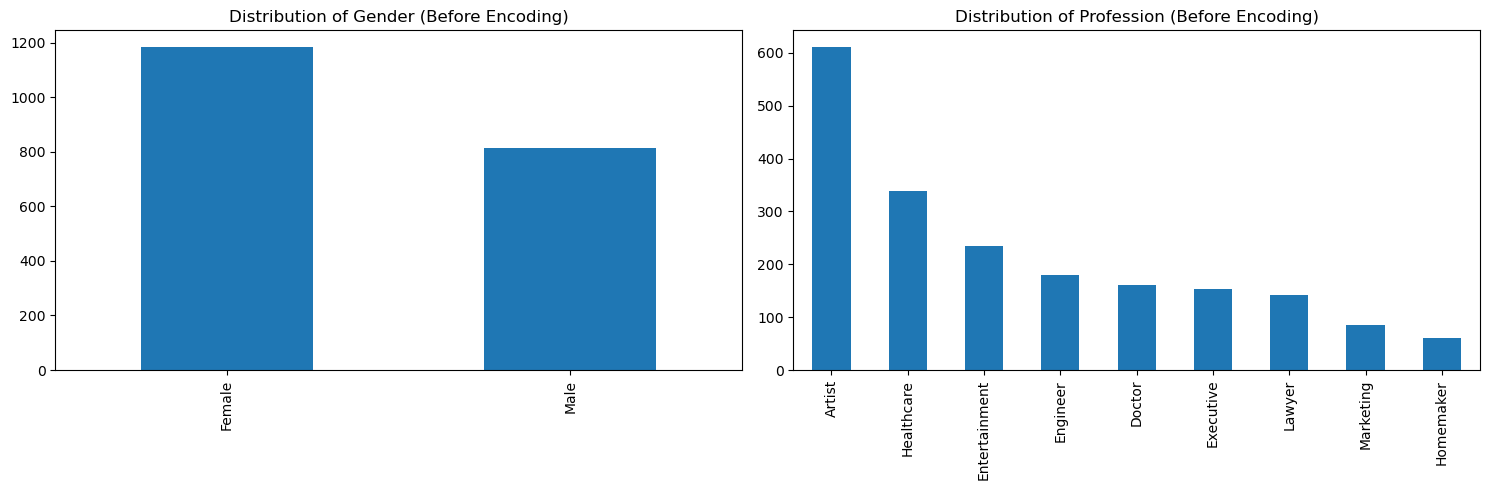


Encoding untuk kolom Gender:
Female -> 0
Male -> 1

Encoding untuk kolom Profession:
Artist -> 0
Doctor -> 1
Engineer -> 2
Entertainment -> 3
Executive -> 4
Healthcare -> 5
Homemaker -> 6
Lawyer -> 7
Marketing -> 8


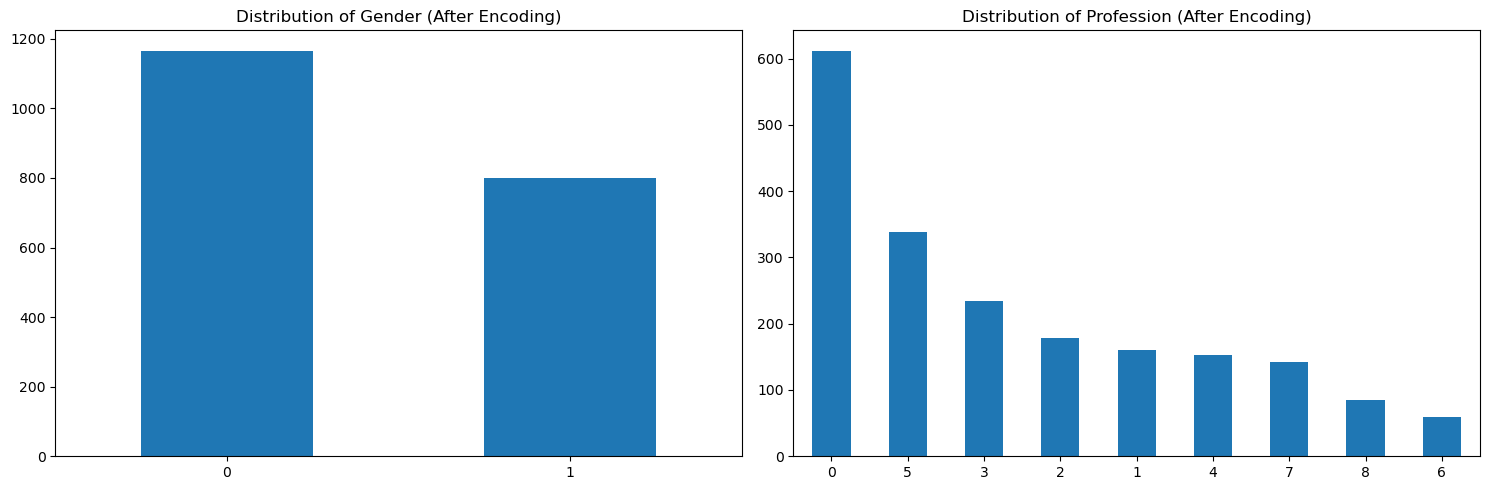


Sample hasil encoding:
   Gender     Profession  Gender_encoded  Profession_encoded
0    Male     Healthcare               1                   5
1    Male       Engineer               1                   2
2  Female       Engineer               0                   2
3  Female         Lawyer               0                   7
4  Female  Entertainment               0                   3
5  Female         Artist               0                   0
6  Female     Healthcare               0                   5
7  Female     Healthcare               0                   5
8    Male       Engineer               1                   2
9  Female         Artist               0                   0

Mapping lengkap:

Gender mapping:
Female               -> 0
Male                 -> 1

Profession mapping:
Artist               -> 0
Doctor               -> 1
Engineer             -> 2
Entertainment        -> 3
Executive            -> 4
Healthcare           -> 5
Homemaker            -> 6
Lawyer         

In [31]:
# 5 Encoding
# Fungsi untuk encoding dan visualisasi
def encode_and_visualize_categorical(df_clustering, categorical_columns):
    df_encoded = df_clustering.copy()
    encoders = {}
    
    # Plot distribusi sebelum encoding
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(1, len(categorical_columns), i)
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column} (Before Encoding)')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Melakukan encoding
    for column in categorical_columns:
        print(f"\nEncoding untuk kolom {column}:")
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        encoders[column] = le
        
        # Menampilkan mapping hasil encoding
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        for original, encoded in mapping.items():
            print(f"{original} -> {encoded}")
    
    # Plot distribusi setelah encoding
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(1, len(categorical_columns), i)
        df_encoded[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column} (After Encoding)')
        plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return df_encoded, encoders

# Melakukan encoding pada kolom Gender dan Profession
categorical_columns = ['Gender', 'Profession']
numerical_columns = ['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']
df_encoded, encoders = encode_and_visualize_categorical(df_clustering, categorical_columns)

# Menampilkan hasil encoding
print("\nSample hasil encoding:")
print(pd.concat([
    df_clustering[categorical_columns],
    df_encoded[categorical_columns].add_suffix('_encoded')
], axis=1).head(10))

# Menyimpan informasi mapping untuk referensi
mapping_info = {}
for column in categorical_columns:
    mapping_info[column] = dict(zip(
        encoders[column].classes_,
        encoders[column].transform(encoders[column].classes_)
    ))

print("\nMapping lengkap:")
for column, mapping in mapping_info.items():
    print(f"\n{column} mapping:")
    for original, encoded in mapping.items():
        print(f"{original:20} -> {encoded}")

In [32]:
df_encoded 

CustomerID  Gender   Age  Annual_Income  Spending_Score  Profession  \
0              1       1  19.0        15000.0            39.0           5   
1              2       1  21.0        35000.0            81.0           2   
2              3       0  20.0        86000.0             6.0           2   
3              4       0  23.0        59000.0            77.0           7   
4              5       0  31.0        38000.0            40.0           3   
...          ...     ...   ...            ...             ...         ...   
1995        1996       0  71.0       184387.0            40.0           0   
1996        1997       0  91.0        73158.0            32.0           1   
1997        1998       1  87.0        90961.0            14.0           5   
1998        1999       1  77.0       182109.0             4.0           4   
1999        2000       1  90.0       110610.0            52.0           3   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]

In [33]:
df_Clustering = df_encoded
df_Clustering

CustomerID  Gender   Age  Annual_Income  Spending_Score  Profession  \
0              1       1  19.0        15000.0            39.0           5   
1              2       1  21.0        35000.0            81.0           2   
2              3       0  20.0        86000.0             6.0           2   
3              4       0  23.0        59000.0            77.0           7   
4              5       0  31.0        38000.0            40.0           3   
...          ...     ...   ...            ...             ...         ...   
1995        1996       0  71.0       184387.0            40.0           0   
1996        1997       0  91.0        73158.0            32.0           1   
1997        1998       1  87.0        90961.0            14.0           5   
1998        1999       1  77.0       182109.0             4.0           4   
1999        2000       1  90.0       110610.0            52.0           3   

      Work_Experience  Family_Size  
0                 1.0          4.0  
1                 3.0          3.0  
2                 1.0          1.0  
3                 0.0          2.0  
4                 2.0          6.0  
...               ...          ...  
1995              8.0          7.0  
1996              7.0          7.0  
1997              9.0          2.0  
1998              7.0          2.0  
1999              5.0          2.0  

[1965 rows x 8 columns]

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

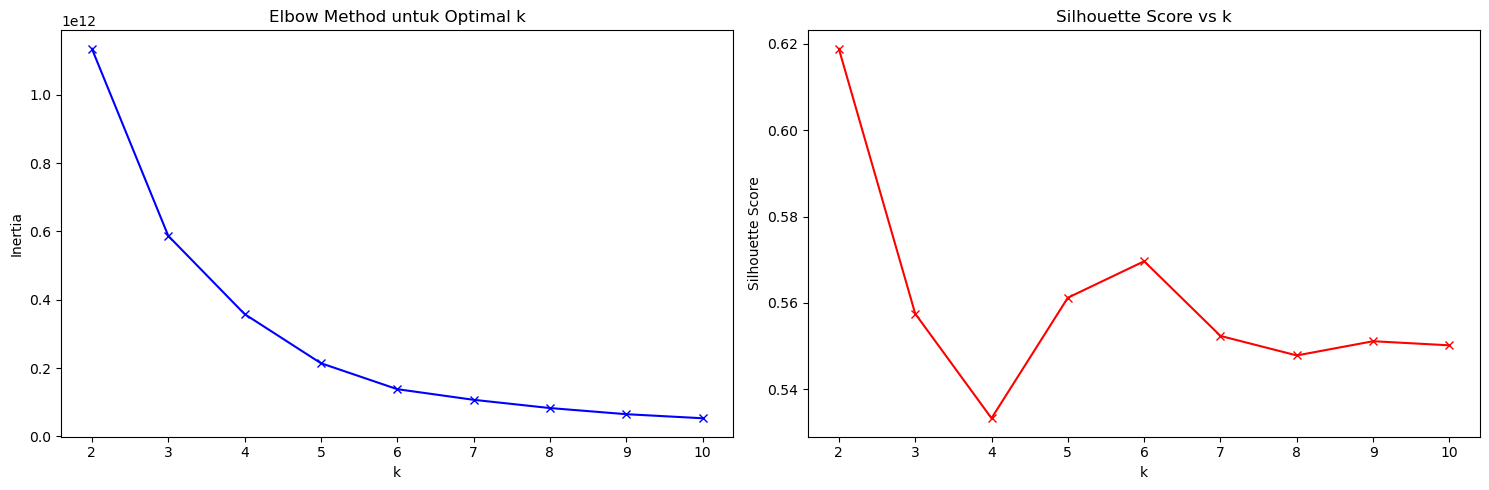


Hasil Evaluasi untuk k = 3:
Inertia: 587085163607.80
Silhouette Score: 0.56


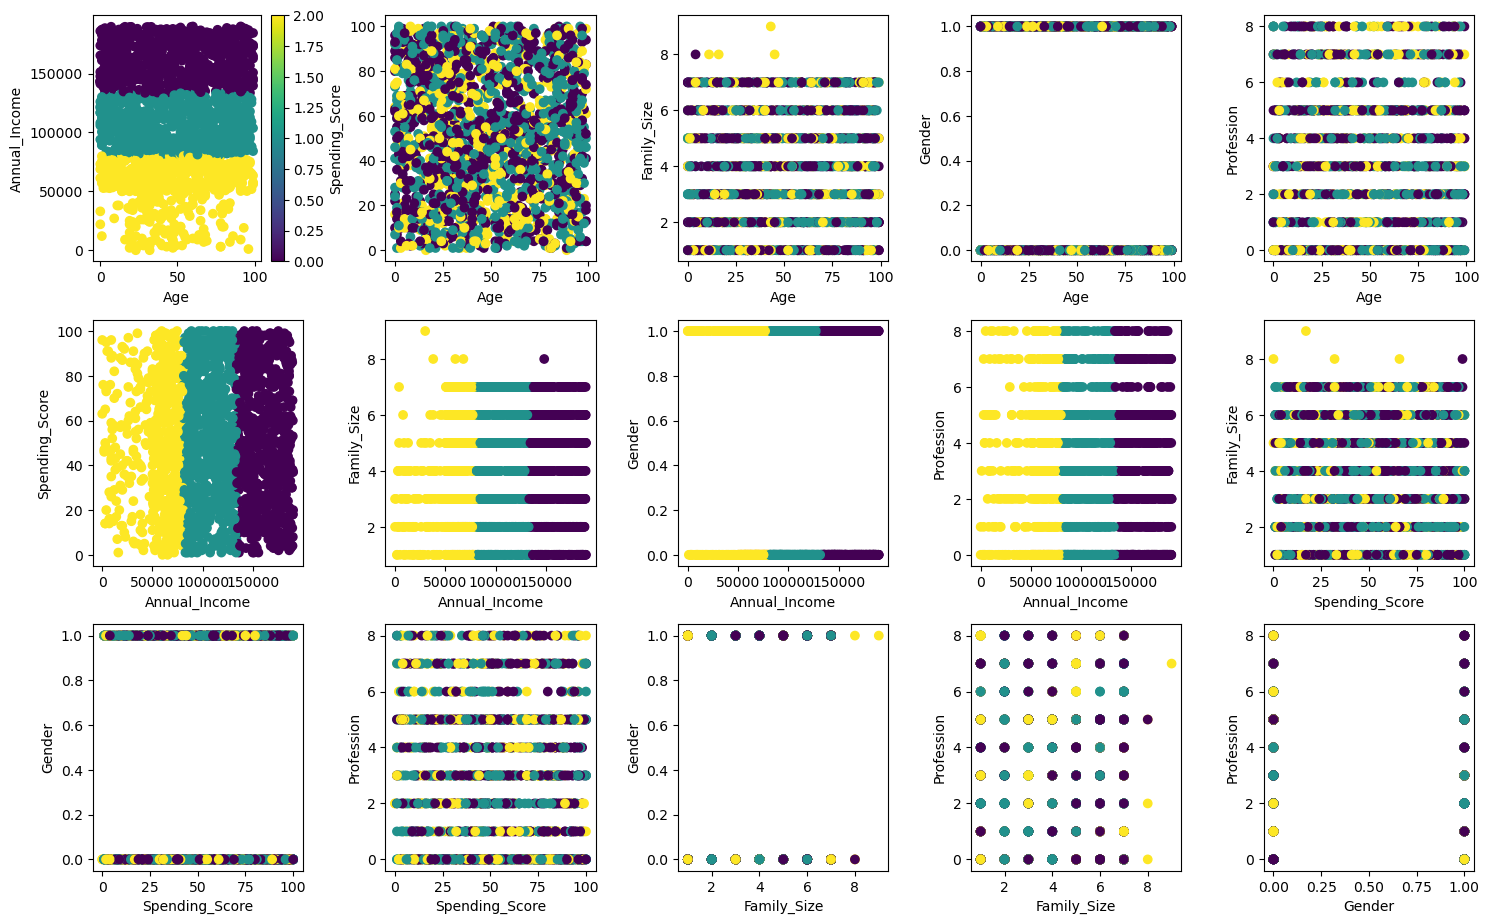


Karakteristik setiap cluster:

Rata-rata setiap fitur per cluster:
           Age  Annual_Income  Spending_Score  Family_Size  Gender  Profession
Cluster                                                                       
0        48.47      161527.06           52.35         3.94    0.39        2.93
1        50.89      105731.06           51.23         3.76    0.44        2.75
2        47.01       55988.70           49.38         3.53    0.39        2.81

Jumlah sampel per cluster:
0    690
1    694
2    581
Name: Cluster, dtype: int64


In [34]:
def find_optimal_clusters(data, max_k):
    """
    Mencari jumlah cluster optimal menggunakan Elbow Method dan Silhouette Score
    """
    inertias = []
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        # Membuat dan melatih model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        # Menyimpan inertia untuk Elbow Method
        inertias.append(kmeans.inertia_)
        
        # Menghitung Silhouette Score
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Visualisasi Elbow Method
    plt.figure(figsize=(15, 5))
    
    # Plot Elbow Curve
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method untuk Optimal k')
    
    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'rx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs k')
    
    plt.tight_layout()
    plt.show()
    
    return K, inertias, silhouette_scores

def train_kmeans_model(data, n_clusters):
    """
    Melatih model K-Means dengan jumlah cluster optimal
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    
    return kmeans, clusters

def visualize_clusters(data, clusters, feature_names):
    """
    Visualisasi hasil clustering
    """
    # Menambahkan label cluster ke dataset
    data_with_clusters = pd.DataFrame(data, columns=feature_names)
    data_with_clusters['Cluster'] = clusters
    
    # Visualisasi untuk setiap pasangan fitur
    n_features = len(feature_names)
    plt.figure(figsize=(15, 15))
    
    plot_idx = 1
    for i in range(n_features):
        for j in range(i+1, n_features):
            plt.subplot(n_features-1, n_features-1, plot_idx)
            scatter = plt.scatter(data[:, i], data[:, j], 
                                c=clusters, cmap='viridis')
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            if plot_idx == 1:  # Hanya tampilkan colorbar untuk plot pertama
                plt.colorbar(scatter)
            plot_idx += 1
    
    plt.tight_layout()
    plt.show()
    
    return data_with_clusters

# Memilih fitur untuk clustering
selected_features = ['Age', 'Annual_Income', 'Spending_Score', 'Family_Size', 
                    'Gender', 'Profession']
X = df_Clustering[selected_features].values

# Mencari jumlah cluster optimal
K, inertias, silhouette_scores = find_optimal_clusters(X, max_k=10)

# Menampilkan hasil evaluasi
optimal_k = 3  # Bisa disesuaikan berdasarkan hasil Elbow Method
print(f"\nHasil Evaluasi untuk k = {optimal_k}:")
kmeans_model, cluster_labels = train_kmeans_model(X, optimal_k)
print(f"Inertia: {kmeans_model.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X, cluster_labels):.2f}")

# Visualisasi hasil clustering
data_with_clusters = visualize_clusters(X, cluster_labels, selected_features)

# Analisis karakteristik cluster
print("\nKarakteristik setiap cluster:")
cluster_stats = data_with_clusters.groupby('Cluster').mean()
print("\nRata-rata setiap fitur per cluster:")
print(cluster_stats.round(2))

# Menghitung jumlah sampel per cluster
cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
print("\nJumlah sampel per cluster:")
print(cluster_sizes)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

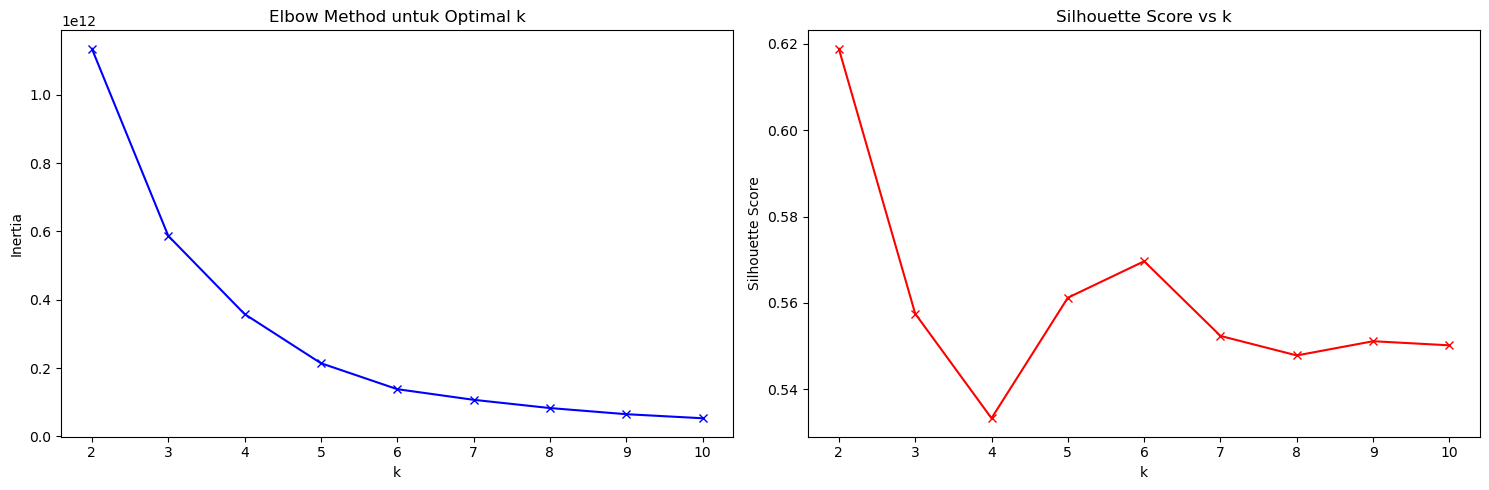


Hasil Evaluasi untuk Setiap Nilai k:
    K       Inertia  Silhouette Score
0   2  1.134885e+12            0.6189
1   3  5.870852e+11            0.5575
2   4  3.579698e+11            0.5333
3   5  2.140395e+11            0.5612
4   6  1.379962e+11            0.5697
5   7  1.068514e+11            0.5524
6   8  8.271793e+10            0.5478
7   9  6.472696e+10            0.5511
8  10  5.282450e+10            0.5502

Analisis Detail untuk k=3:


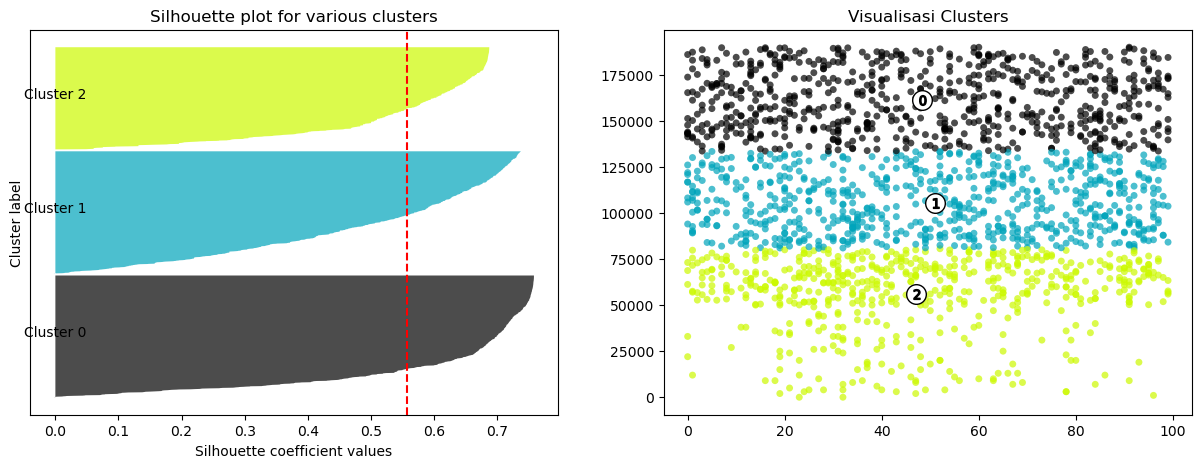

Rata-rata Silhouette Score: 0.5575

Distribusi Sampel per Cluster:
0    691
1    694
2    580
dtype: int64


In [35]:
def evaluate_clustering(data, max_k):
    inertias = []
    silhouette_avg = []
    K = range(2, max_k+1)
    
    for k in K:
        # Membuat model K-Means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        # Menyimpan inertia
        inertias.append(kmeans.inertia_)
        
        # Menghitung silhouette score
        silhouette_avg.append(silhouette_score(data, kmeans.labels_))
    
    return K, inertias, silhouette_avg

def plot_evaluation_results(K, inertias, silhouette_avg):
    """
    Visualisasi hasil evaluasi
    """
    # Plot Elbow Method dan Silhouette Score
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow Method
    ax1.plot(K, inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method untuk Optimal k')
    
    # Silhouette Score
    ax2.plot(K, silhouette_avg, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs k')
    
    plt.tight_layout()
    plt.show()

def plot_silhouette_analysis(data, n_clusters):
    """
    Analisis detail Silhouette untuk jumlah cluster tertentu
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(data)
    
    # Silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    
    # Plot silhouette
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    
    # Plot clusters
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data[:, 0], data[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')
    
    ax2.set_title("Visualisasi Clusters")
    plt.show()
    
    return silhouette_avg, cluster_labels

# Memilih fitur untuk clustering
selected_features = ['Age', 'Annual_Income', 'Spending_Score', 'Family_Size', 
                    'Gender', 'Profession']
X = df_Clustering[selected_features].values

# Evaluasi untuk berbagai nilai k
max_k = 10
K, inertias, silhouette_avg = evaluate_clustering(X, max_k)

# Plot hasil evaluasi
plot_evaluation_results(K, inertias, silhouette_avg)

# Menampilkan hasil evaluasi dalam tabel
evaluation_results = pd.DataFrame({
    'K': K,
    'Inertia': inertias,
    'Silhouette Score': silhouette_avg
})
print("\nHasil Evaluasi untuk Setiap Nilai k:")
print(evaluation_results.round(4))

# Analisis detail untuk k optimal (misalnya k=5)
optimal_k = 3  # Bisa disesuaikan berdasarkan hasil
print(f"\nAnalisis Detail untuk k={optimal_k}:")
silhouette_avg, cluster_labels = plot_silhouette_analysis(X[:, :2], optimal_k)
print(f"Rata-rata Silhouette Score: {silhouette_avg:.4f}")

# Menghitung distribusi cluster
cluster_distribution = pd.Series(cluster_labels).value_counts().sort_index()
print("\nDistribusi Sampel per Cluster:")
print(cluster_distribution)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

MODEL DENGAN SEMUA FITUR

Fitur yang terpilih: ['Age', 'Annual_Income', 'Family_Size']


MODEL DENGAN FITUR TERSELEKSI


PERBANDINGAN PERFORMA MODEL
             Metrik  Model Original  Model Feature Selection
0  Silhouette Score    5.575000e-01             5.575000e-01
1           Inertia    5.870852e+11             5.870898e+11


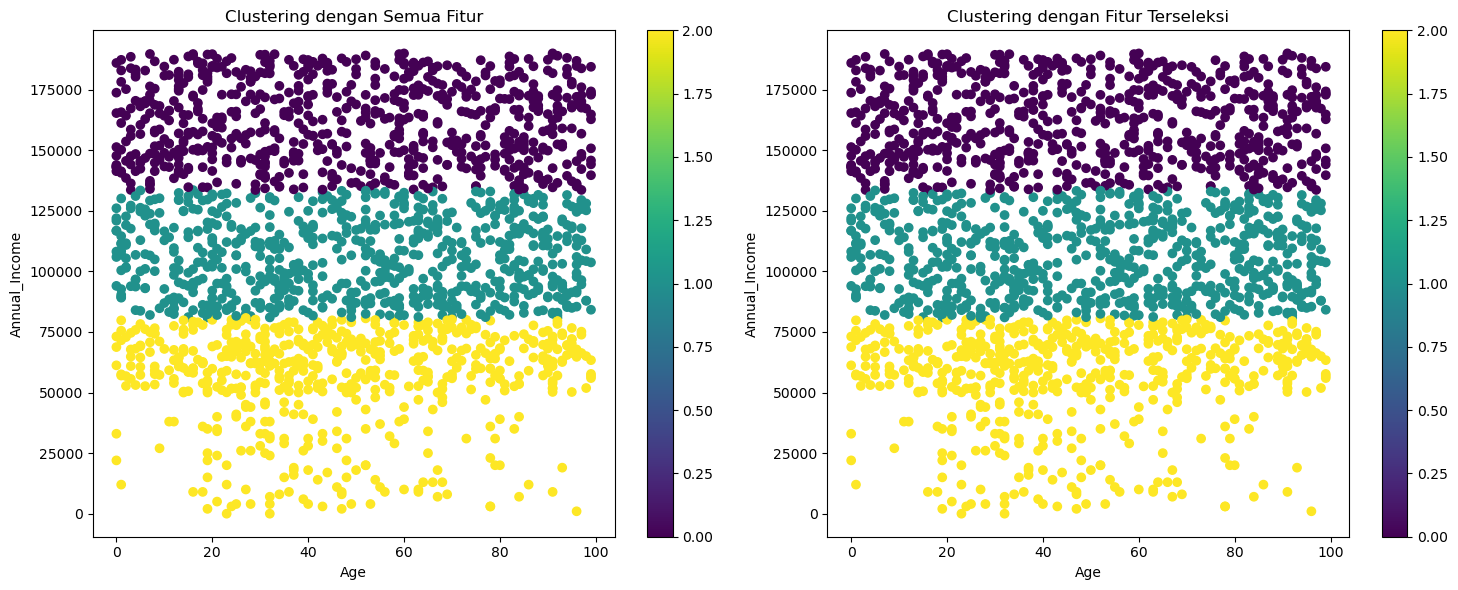



KARAKTERISTIK CLUSTER

Karakteristik Cluster (Model Original):
           Age  Annual_Income  Spending_Score  Family_Size  Gender  Profession
Cluster                                                                       
0        48.47      161527.06           52.35         3.94    0.39        2.93
1        50.89      105731.06           51.23         3.76    0.44        2.75
2        47.01       55988.70           49.38         3.53    0.39        2.81

Karakteristik Cluster (Model Feature Selection):
           Age  Annual_Income  Family_Size
Cluster                                   
0        48.43      161486.57         3.94
1        50.91      105655.02         3.77
2        47.04       55945.95         3.53


DISTRIBUSI SAMPEL PER CLUSTER

Model Original:
0    690
1    694
2    581
dtype: int64

Model Feature Selection:
0    691
1    694
2    580
dtype: int64


In [36]:
def perform_feature_selection(X, y, k_features=3):
    """
    Melakukan feature selection menggunakan SelectKBest
    """
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_selected = selector.fit_transform(X, y)
    selected_features_mask = selector.get_support()
    
    return X_selected, selected_features_mask

def evaluate_clustering_model(X, n_clusters):
    """
    Evaluasi model clustering dan return metrik evaluasi
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, clusters)
    inertia = kmeans.inertia_
    
    return clusters, silhouette_avg, inertia, kmeans

def plot_clusters_comparison(X_original, X_selected, clusters_original, clusters_selected, 
                           features_original, features_selected):
    """
    Visualisasi perbandingan hasil clustering
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot untuk model original
    scatter1 = axes[0].scatter(X_original[:, 0], X_original[:, 1], 
                             c=clusters_original, cmap='viridis')
    axes[0].set_xlabel(features_original[0])
    axes[0].set_ylabel(features_original[1])
    axes[0].set_title('Clustering dengan Semua Fitur')
    plt.colorbar(scatter1, ax=axes[0])
    
    # Plot untuk model dengan feature selection
    scatter2 = axes[1].scatter(X_selected[:, 0], X_selected[:, 1], 
                             c=clusters_selected, cmap='viridis')
    axes[1].set_xlabel(features_selected[0])
    axes[1].set_ylabel(features_selected[1])
    axes[1].set_title('Clustering dengan Fitur Terseleksi')
    plt.colorbar(scatter2, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

# Persiapan data
features = ['Age', 'Annual_Income', 'Spending_Score', 'Family_Size', 'Gender', 'Profession']
X_original = df_Clustering[features].values
n_clusters = 3

# Model dengan semua fitur
print("="*50)
print("MODEL DENGAN SEMUA FITUR")
print("="*50)
clusters_original, silhouette_original, inertia_original, kmeans_original = evaluate_clustering_model(X_original, n_clusters)

# Melakukan feature selection
# Pertama, kita gunakan hasil clustering original sebagai target untuk feature selection
X_selected, selected_features_mask = perform_feature_selection(X_original, clusters_original)
selected_features = [features[i] for i in range(len(features)) if selected_features_mask[i]]

print("\nFitur yang terpilih:", selected_features)

# Model dengan fitur terseleksi
print("\n")
print("="*50)
print("MODEL DENGAN FITUR TERSELEKSI")
print("="*50)
X_selected_full = df_Clustering[selected_features].values
clusters_selected, silhouette_selected, inertia_selected, kmeans_selected = evaluate_clustering_model(X_selected_full, n_clusters)

# Perbandingan performa
print("\n")
print("="*50)
print("PERBANDINGAN PERFORMA MODEL")
print("="*50)
comparison_df = pd.DataFrame({
    'Metrik': ['Silhouette Score', 'Inertia'],
    'Model Original': [silhouette_original, inertia_original],
    'Model Feature Selection': [silhouette_selected, inertia_selected]
})
print(comparison_df.round(4))

# Visualisasi hasil clustering
plot_clusters_comparison(X_original[:, :2], X_selected_full[:, :2],
                        clusters_original, clusters_selected,
                        features[:2], selected_features[:2])

# Analisis karakteristik cluster
print("\n")
print("="*50)
print("KARAKTERISTIK CLUSTER")
print("="*50)

# Untuk model original
df_original = pd.DataFrame(X_original, columns=features)
df_original['Cluster'] = clusters_original
print("\nKarakteristik Cluster (Model Original):")
print(df_original.groupby('Cluster').mean().round(2))

# Untuk model dengan feature selection
df_selected = pd.DataFrame(X_selected_full, columns=selected_features)
df_selected['Cluster'] = clusters_selected
print("\nKarakteristik Cluster (Model Feature Selection):")
print(df_selected.groupby('Cluster').mean().round(2))

# Distribusi sampel per cluster
print("\n")
print("="*50)
print("DISTRIBUSI SAMPEL PER CLUSTER")
print("="*50)
print("\nModel Original:")
print(pd.Series(clusters_original).value_counts().sort_index())
print("\nModel Feature Selection:")
print(pd.Series(clusters_selected).value_counts().sort_index())

SILHOUETTE SCORE ANALYSIS

Silhouette Score sebelum Feature Selection: 0.6

Fitur yang terpilih: ['Age', 'Annual_Income', 'Family_Size']

Silhouette Score setelah Feature Selection: 0.6

Perbandingan Silhouette Score:
                           Silhouette Score
Model                                      
Sebelum Feature Selection            0.5575
Setelah Feature Selection            0.5575


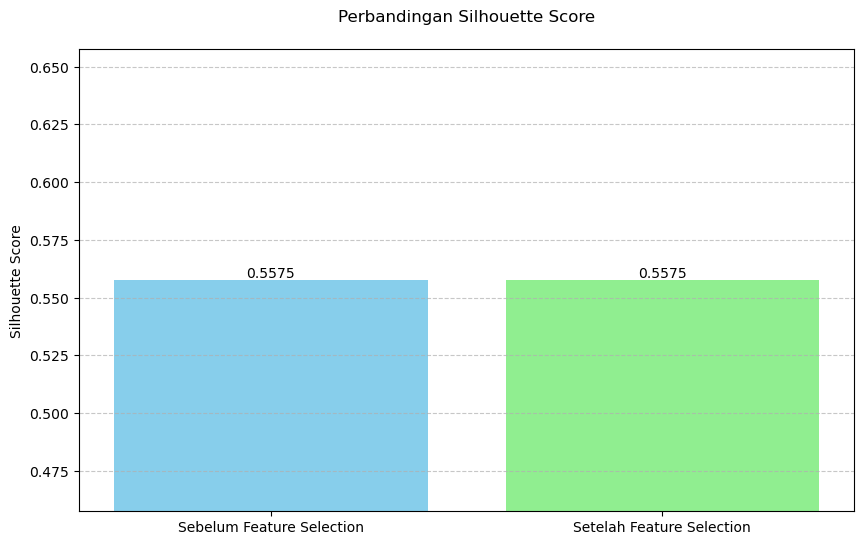


Persentase perubahan Silhouette Score: 0.00%


In [37]:
def perform_feature_selection(X, y, k_features=3):
    """
    Melakukan feature selection menggunakan SelectKBest
    """
    selector = SelectKBest(score_func=f_classif, k=k_features)
    X_selected = selector.fit_transform(X, y)
    selected_features_mask = selector.get_support()
    
    return X_selected, selected_features_mask

def calculate_silhouette(X, n_clusters):
    """
    Menghitung Silhouette Score untuk data clustering
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    
    return silhouette_avg, clusters

def plot_silhouette_comparison(silhouette_original, silhouette_selected):
    """
    Membuat visualisasi perbandingan Silhouette Score
    """
    plt.figure(figsize=(10, 6))
    scores = [silhouette_original, silhouette_selected]
    labels = ['Sebelum Feature Selection', 'Setelah Feature Selection']
    
    bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
    plt.title('Perbandingan Silhouette Score', pad=20)
    plt.ylabel('Silhouette Score')
    plt.ylim(min(scores) - 0.1, max(scores) + 0.1)
    
    # Menambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Persiapan data
features = ['Age', 'Annual_Income', 'Spending_Score', 'Family_Size', 'Gender', 'Profession']
X_original = df_Clustering[features].values
n_clusters = 3

# Menghitung Silhouette Score sebelum Feature Selection
print("="*50)
print("SILHOUETTE SCORE ANALYSIS")
print("="*50)

silhouette_original, clusters_original = calculate_silhouette(X_original, n_clusters)
print(f"\nSilhouette Score sebelum Feature Selection: {silhouette_original:.1f}")

# Melakukan Feature Selection
X_selected, selected_features_mask = perform_feature_selection(X_original, clusters_original)
selected_features = [features[i] for i in range(len(features)) if selected_features_mask[i]]
print(f"\nFitur yang terpilih: {selected_features}")

# Menghitung Silhouette Score setelah Feature Selection
X_selected_full = df_Clustering[selected_features].values
silhouette_selected, clusters_selected = calculate_silhouette(X_selected_full, n_clusters)
print(f"\nSilhouette Score setelah Feature Selection: {silhouette_selected:.1f}")

# Membuat tabel perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Sebelum Feature Selection', 'Setelah Feature Selection'],
    'Silhouette Score': [silhouette_original, silhouette_selected]
})
print("\nPerbandingan Silhouette Score:")
print(comparison_df.set_index('Model').round(4))

# Visualisasi perbandingan
plot_silhouette_comparison(silhouette_original, silhouette_selected)

# Menghitung persentase perubahan
percent_change = ((silhouette_selected - silhouette_original) / silhouette_original) * 100
print(f"\nPersentase perubahan Silhouette Score: {percent_change:.2f}%")

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

VISUALISASI HASIL CLUSTERING

1. Visualisasi 2D menggunakan dua fitur pertama:


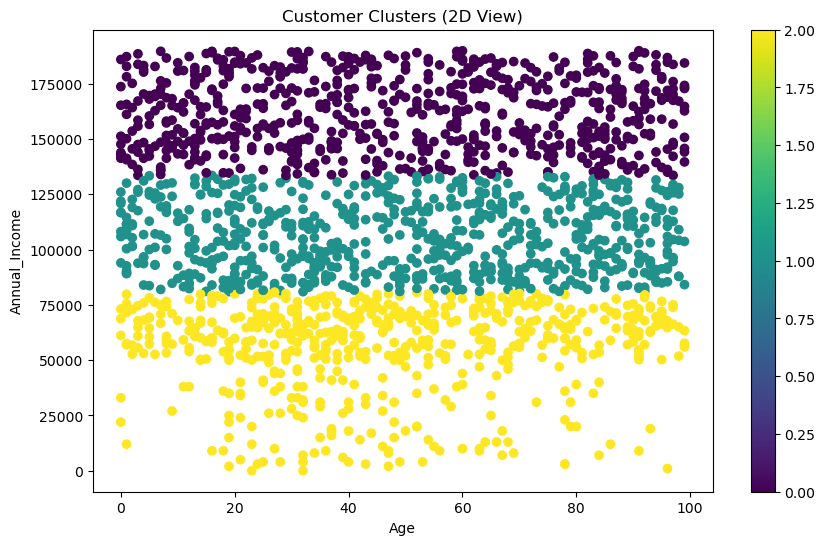

In [38]:
def plot_2d_clusters(X, clusters, features, title):
    """
    Membuat scatter plot 2D untuk hasil clustering
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

def plot_3d_clusters(X, clusters, features, title):
    """
    Membuat scatter plot 3D untuk hasil clustering
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

def plot_pca_clusters(X, clusters, features, title):
    """
    Membuat visualisasi menggunakan PCA
    """
    # Melakukan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Plot hasil PCA
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'{title} (PCA Projection)')
    plt.colorbar(scatter)
    
    # Menampilkan variance ratio
    print(f"\nVariance Ratio untuk {title}:")
    print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
    print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.4f}")
    plt.show()

def plot_feature_importance(pca, features):
    """
    Visualisasi kontribusi setiap fitur terhadap principal components
    """
    plt.figure(figsize=(12, 6))
    components = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2'],
        index=features
    )
    
    sns.heatmap(components, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Contributions to Principal Components')
    plt.show()

# Persiapkan data
selected_features = ['Age', 'Annual_Income', 'Spending_Score', 'Family_Size', 
                    'Gender', 'Profession']
X = df_Clustering[selected_features].values
n_clusters = 3

# Latih model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

print("="*50)
print("VISUALISASI HASIL CLUSTERING")
print("="*50)

# 1. Scatter plot 2D untuk dua fitur pertama
print("\n1. Visualisasi 2D menggunakan dua fitur pertama:")
plot_2d_clusters(X[:, :2], clusters, selected_features[:2], 
                'Customer Clusters (2D View)')




2. Visualisasi 3D menggunakan tiga fitur pertama:


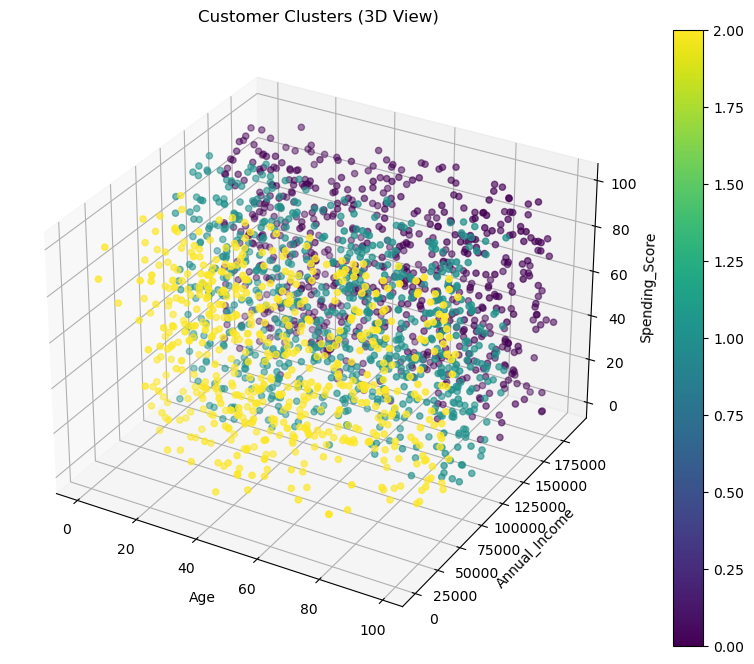

In [39]:
# 2. Scatter plot 3D untuk tiga fitur pertama
print("\n2. Visualisasi 3D menggunakan tiga fitur pertama:")
plot_3d_clusters(X[:, :3], clusters, selected_features[:3], 
                'Customer Clusters (3D View)')




3. Visualisasi menggunakan PCA:

Variance Ratio untuk Customer Clusters:
PC1: 1.0000
PC2: 0.0000
Total Variance Explained: 1.0000


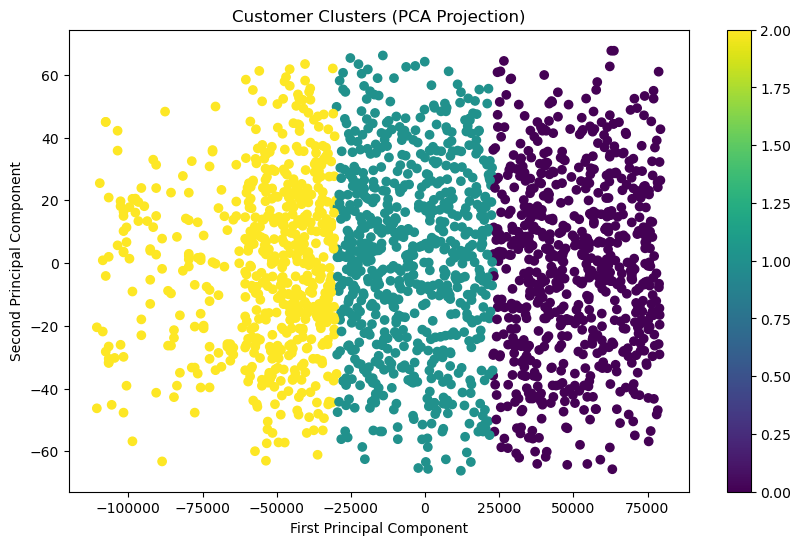

In [40]:
# 3. PCA Visualization
print("\n3. Visualisasi menggunakan PCA:")
plot_pca_clusters(X, clusters, selected_features, 
                 'Customer Clusters')




4. Kontribusi fitur terhadap Principal Components:


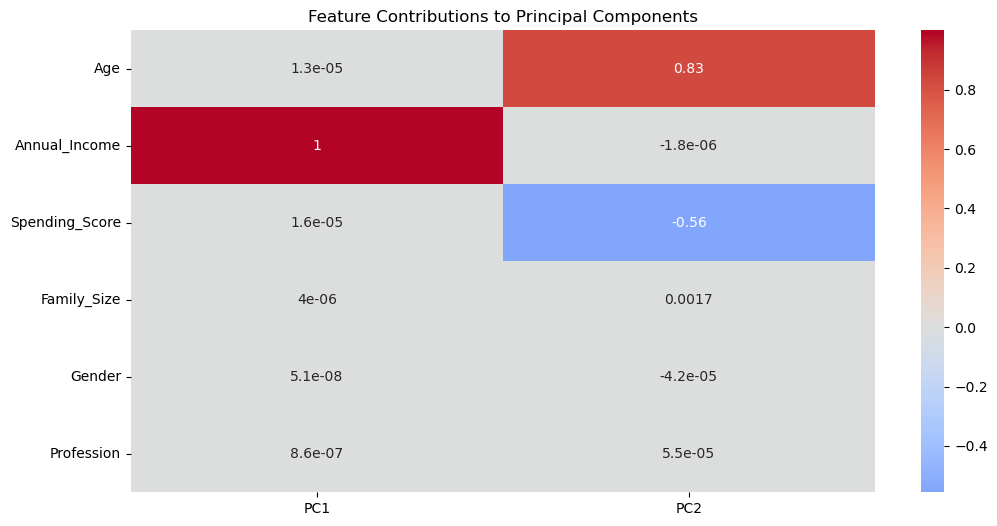

In [41]:
# 4. Feature Importance dalam PCA
pca = PCA(n_components=2)
pca.fit(X)
print("\n4. Kontribusi fitur terhadap Principal Components:")
plot_feature_importance(pca, selected_features)



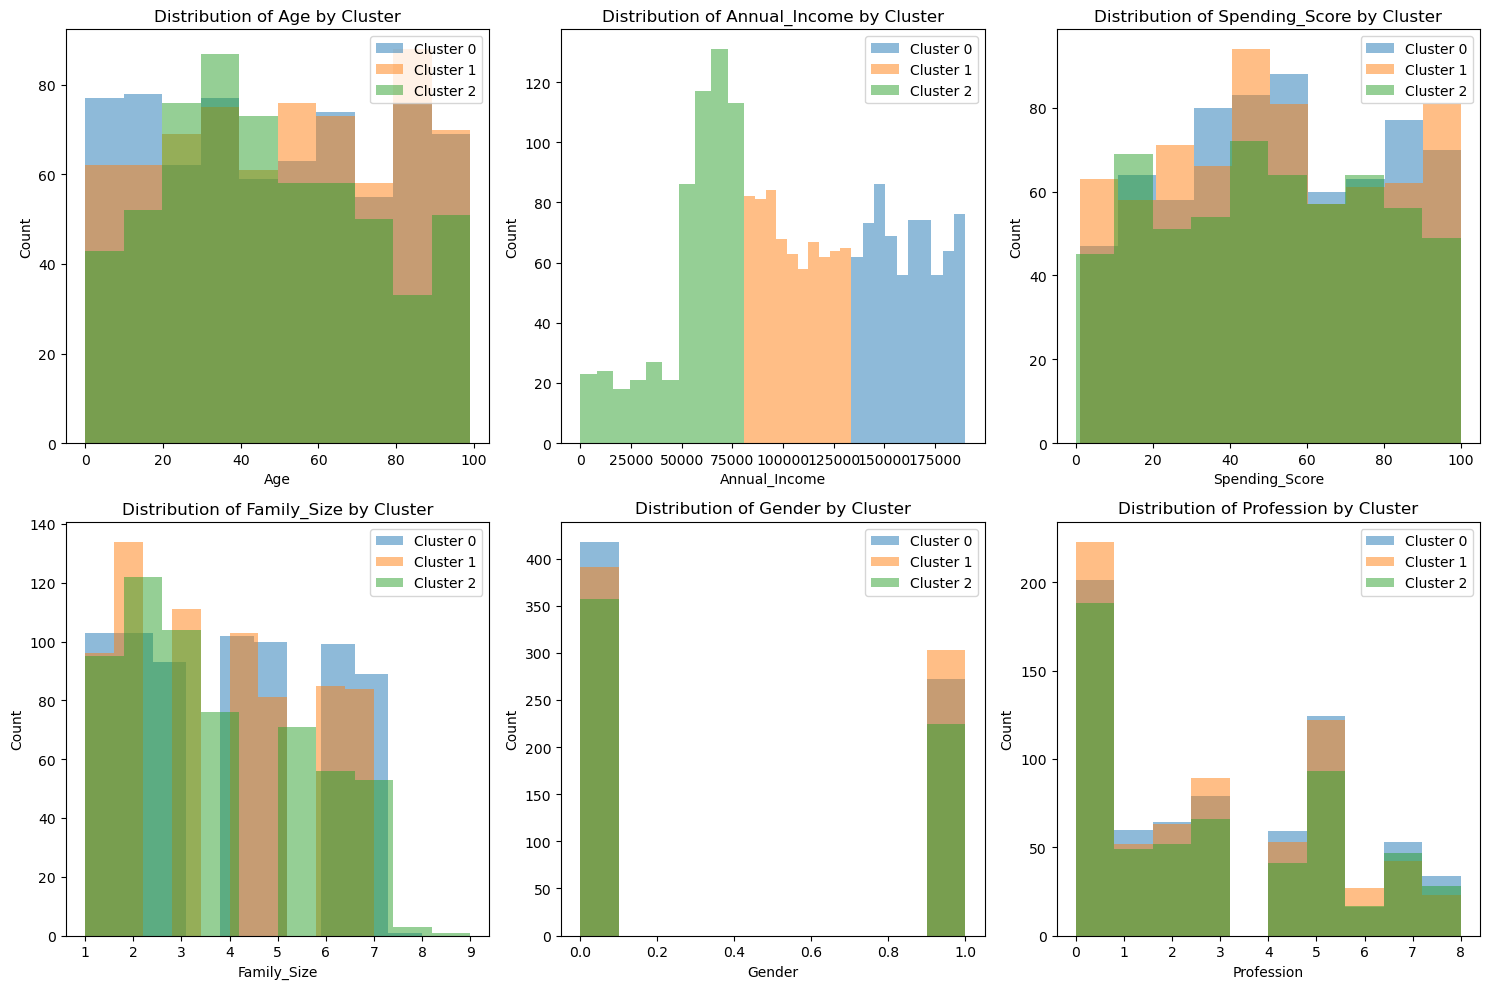



STATISTIK CLUSTER

Rata-rata setiap fitur per cluster:
           Age  Annual_Income  Spending_Score  Family_Size  Gender  Profession
Cluster                                                                       
0        48.47      161527.06           52.35         3.94    0.39        2.93
1        50.89      105731.06           51.23         3.76    0.44        2.75
2        47.01       55988.70           49.38         3.53    0.39        2.81

Jumlah sampel per cluster:
0    690
1    694
2    581
Name: Cluster, dtype: int64


In [42]:
# 5. Visualisasi distribusi cluster untuk setiap fitur
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    for cluster in range(n_clusters):
        plt.hist(X[clusters == cluster, i-1], 
                alpha=0.5, 
                label=f'Cluster {cluster}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.legend()
plt.tight_layout()
plt.show()

# Statistik cluster
print("\n")
print("="*50)
print("STATISTIK CLUSTER")
print("="*50)

cluster_df = pd.DataFrame(X, columns=selected_features)
cluster_df['Cluster'] = clusters

print("\nRata-rata setiap fitur per cluster:")
print(cluster_df.groupby('Cluster').mean().round(2))

print("\nJumlah sampel per cluster:")
print(cluster_df['Cluster'].value_counts().sort_index())

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.


**Cluster 1 (Label: 0):**  
- **Karakteristik:**
  - Rata-rata usia: 48.47 tahun.
  - Penghasilan tahunan tertinggi: 161,527.06.
  - Spending Score sedang: 52.35.
  - Ukuran keluarga: 3.94.
- **Jumlah sampel:** 690.
- **Interpretasi:**  
  Cluster ini mencirikan pelanggan yang lebih dewasa dengan penghasilan tinggi, namun Spending Score berada di tingkat menengah. Pelanggan dalam kelompok ini kemungkinan memiliki preferensi belanja lebih terkontrol meskipun memiliki kemampuan finansial yang tinggi. **Cluster 1:** Menawarkan produk premium atau investasi.

---

**Cluster 2 (Label: 1):**  
- **Karakteristik:**
  - Rata-rata usia: 50.89 tahun.
  - Penghasilan tahunan menengah: 105,731.06.
  - Spending Score sedang: 51.23.
  - Ukuran keluarga: 3.76.
  - Komposisi gender relatif seimbang (gender: 0.44).
- **Jumlah sampel:** 694.
- **Interpretasi:**  
  Cluster ini berisi pelanggan dengan penghasilan menengah yang Spending Score-nya juga rata-rata. Kelompok ini bisa terdiri dari pelanggan yang lebih stabil secara finansial namun pengeluaran mereka tetap terkendali. **Cluster 2:** Menyediakan opsi produk berkualitas dengan harga menengah.

---

**Cluster 3 (Label: 2):**  
- **Karakteristik:**
  - Rata-rata usia: 47.01 tahun.
  - Penghasilan tahunan terendah: 55,988.70.
  - Spending Score paling rendah: 49.38.
  - Ukuran keluarga: 3.53 (terkecil dibanding cluster lain).
- **Jumlah sampel:** 581.
- **Interpretasi:**  
  Cluster ini menunjukkan pelanggan dengan penghasilan rendah dan Spending Score terendah, yang mungkin mencerminkan keterbatasan daya beli. Pelanggan dalam cluster ini cenderung lebih hemat dan mengelola pengeluaran dengan ketat. **Cluster 3:** Menargetkan produk terjangkau atau program diskon. 

---




# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
cluster_df

Age  Annual_Income  Spending_Score  Family_Size  Gender  Profession  \
0     19.0        15000.0            39.0          4.0     1.0         5.0   
1     21.0        35000.0            81.0          3.0     1.0         2.0   
2     20.0        86000.0             6.0          1.0     0.0         2.0   
3     23.0        59000.0            77.0          2.0     0.0         7.0   
4     31.0        38000.0            40.0          6.0     0.0         3.0   
...    ...            ...             ...          ...     ...         ...   
1960  71.0       184387.0            40.0          7.0     0.0         0.0   
1961  91.0        73158.0            32.0          7.0     0.0         1.0   
1962  87.0        90961.0            14.0          2.0     1.0         5.0   
1963  77.0       182109.0             4.0          2.0     1.0         4.0   
1964  90.0       110610.0            52.0          2.0     1.0         3.0   

      Cluster  
0           2  
1           2  
2           1  
3           2  
4           2  
...       ...  
1960        0  
1961        2  
1962        1  
1963        0  
1964        1  

[1965 rows x 7 columns]

In [44]:
cluster_df.to_csv('HasilClustering_Submission_Akhir_BMLP_AlfinBahruRahmikaUmar.csv', index=False)
cluster_df

Age  Annual_Income  Spending_Score  Family_Size  Gender  Profession  \
0     19.0        15000.0            39.0          4.0     1.0         5.0   
1     21.0        35000.0            81.0          3.0     1.0         2.0   
2     20.0        86000.0             6.0          1.0     0.0         2.0   
3     23.0        59000.0            77.0          2.0     0.0         7.0   
4     31.0        38000.0            40.0          6.0     0.0         3.0   
...    ...            ...             ...          ...     ...         ...   
1960  71.0       184387.0            40.0          7.0     0.0         0.0   
1961  91.0        73158.0            32.0          7.0     0.0         1.0   
1962  87.0        90961.0            14.0          2.0     1.0         5.0   
1963  77.0       182109.0             4.0          2.0     1.0         4.0   
1964  90.0       110610.0            52.0          2.0     1.0         3.0   

      Cluster  
0           2  
1           2  
2           1  
3           2  
4           2  
...       ...  
1960        0  
1961        2  
1962        1  
1963        0  
1964        1  

[1965 rows x 7 columns]